In [1]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt

import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import inv, norm, sqrtm

import os
os.chdir('/home/kei/Desktop/dpp/')

import sampler.dpp as dpp
import sampler.utils as utils

import helper.lr as lr

In [2]:
# currently only support cpu mode
flag_gpu = False
nTrn = 4000
nTst = 1000
trnX, tstX, trnY, tstY = utils.load_mnist(ntrain=nTrn, ntest=nTst)

pairwise_dists = squareform(pdist(np.concatenate((trnX, tstX)), 'euclidean'))
L = np.exp(-pairwise_dists ** 2 / 20 ** 2)
trnL = L[:nTrn, :nTrn]

k_group = [10,20,30,50,70,100]
error_unif = np.zeros((2, len(k_group)))
error_dpp = np.zeros((2, len(k_group)))

for run_id in range(5):
    for k_idx in range(len(k_group)):
        k = k_group[k_idx]
        # Uniform sampling
        unif_smpl = np.random.permutation(nTrn)[:k]

        C = L[np.ix_(range(nTrn+nTst), unif_smpl)]
        W = C[np.ix_(unif_smpl, range(k))]
        X_prime = C.dot(inv(np.real(sqrtm(W))))
        trnX_prime = X_prime[:nTrn]
        tstX_prime = X_prime[nTrn:]
        
        tmp_trn_err, tmp_tst_err = lr.train_predict(trnX_prime, trnY, tstX_prime, tstY)
        error_unif[0, k_idx] += tmp_trn_err
        error_unif[1, k_idx] += tmp_tst_err

        # DPP
        D, V = utils.get_eig(trnL, flag_gpu=flag_gpu)
        E = utils.get_sympoly(D, k, flag_gpu=flag_gpu)
        dpp_smpl  = dpp.sample(D, V, E=E, k=k, flag_gpu=flag_gpu)

        C = L[np.ix_(range(nTrn+nTst), dpp_smpl)]
        W = C[np.ix_(dpp_smpl, range(k))]
        X_prime = C.dot(inv(np.real(sqrtm(W))))
        trnX_prime = X_prime[:nTrn]
        tstX_prime = X_prime[nTrn:]

        tmp_trn_err, tmp_tst_err = lr.train_predict(trnX_prime, trnY, tstX_prime, tstY)
        error_dpp[0, k_idx] += tmp_trn_err
        error_dpp[1, k_idx] += tmp_tst_err

/home/kei/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 1, cost = 2.308539, acc = 12.70%
Epoch 2, cost = 2.297562, acc = 12.70%
Epoch 3, cost = 2.288054, acc = 12.70%
Epoch 4, cost = 2.279776, acc = 12.90%
Epoch 5, cost = 2.272192, acc = 13.00%
Epoch 6, cost = 2.265008, acc = 13.90%
Epoch 7, cost = 2.258066, acc = 15.20%
Epoch 8, cost = 2.251279, acc = 16.20%
Epoch 9, cost = 2.244601, acc = 16.80%
Epoch 10, cost = 2.238007, acc = 17.80%
Epoch 11, cost = 2.231481, acc = 19.10%
Epoch 12, cost = 2.225016, acc = 20.00%
Epoch 13, cost = 2.218609, acc = 20.90%
Epoch 14, cost = 2.212255, acc = 21.90%
Epoch 15, cost = 2.205955, acc = 23.20%
Epoch 16, cost = 2.199706, acc = 24.30%
Epoch 17, cost = 2.193509, acc = 25.60%
Epoch 18, cost = 2.187362, acc = 26.80%
Epoch 19, cost = 2.181265, acc = 27.90%
Epoch 20, cost = 2.175218, acc = 29.70%
Epoch 21, cost = 2.169221, acc = 30.10%
Epoch 22, cost = 2.163273, acc = 31.70%
Epoch 23, cost = 2.157373, acc = 32.20%
Epoch 24, cost = 2.151522, acc = 33.30%
Epoch 25, cost = 2.145719, acc = 33.90%
Epoch 26,

Epoch 25, cost = 2.068648, acc = 50.20%
Epoch 26, cost = 2.059845, acc = 50.80%
Epoch 27, cost = 2.051121, acc = 51.40%
Epoch 28, cost = 2.042477, acc = 52.10%
Epoch 29, cost = 2.033911, acc = 52.90%
Epoch 30, cost = 2.025423, acc = 53.30%
Epoch 31, cost = 2.017012, acc = 53.80%
Epoch 32, cost = 2.008677, acc = 54.80%
Epoch 33, cost = 2.000418, acc = 55.80%
Epoch 34, cost = 1.992234, acc = 56.50%
Epoch 35, cost = 1.984125, acc = 56.60%
Epoch 36, cost = 1.976089, acc = 57.30%
Epoch 37, cost = 1.968126, acc = 57.60%
Epoch 38, cost = 1.960235, acc = 58.20%
Epoch 39, cost = 1.952416, acc = 58.60%
Epoch 40, cost = 1.944668, acc = 59.00%
Epoch 41, cost = 1.936991, acc = 59.70%
Epoch 42, cost = 1.929383, acc = 60.60%
Epoch 43, cost = 1.921844, acc = 61.00%
Epoch 44, cost = 1.914373, acc = 61.10%
Epoch 45, cost = 1.906970, acc = 61.40%
Epoch 46, cost = 1.899634, acc = 61.70%
Epoch 47, cost = 1.892365, acc = 62.00%
Epoch 48, cost = 1.885160, acc = 62.20%
Epoch 49, cost = 1.878022, acc = 62.60%


Epoch 48, cost = 1.864123, acc = 61.70%
Epoch 49, cost = 1.856823, acc = 62.00%
Epoch 50, cost = 1.849591, acc = 62.30%
Epoch 51, cost = 1.842424, acc = 62.30%
Epoch 52, cost = 1.835323, acc = 62.50%
Epoch 53, cost = 1.828287, acc = 62.70%
Epoch 54, cost = 1.821314, acc = 62.80%
Epoch 55, cost = 1.814406, acc = 63.00%
Epoch 56, cost = 1.807560, acc = 63.10%
Epoch 57, cost = 1.800776, acc = 63.40%
Epoch 58, cost = 1.794055, acc = 63.60%
Epoch 59, cost = 1.787394, acc = 64.00%
Epoch 60, cost = 1.780794, acc = 64.50%
Epoch 61, cost = 1.774254, acc = 64.80%
Epoch 62, cost = 1.767772, acc = 64.90%
Epoch 63, cost = 1.761350, acc = 65.10%
Epoch 64, cost = 1.754985, acc = 65.00%
Epoch 65, cost = 1.748679, acc = 65.20%
Epoch 66, cost = 1.742428, acc = 65.20%
Epoch 67, cost = 1.736234, acc = 65.30%
Epoch 68, cost = 1.730096, acc = 65.50%
Epoch 69, cost = 1.724012, acc = 65.60%
Epoch 70, cost = 1.717984, acc = 65.80%
Epoch 71, cost = 1.712009, acc = 66.00%
Epoch 72, cost = 1.706087, acc = 66.20%


Epoch 76, cost = 1.541777, acc = 71.90%
Epoch 77, cost = 1.535363, acc = 72.00%
Epoch 78, cost = 1.529017, acc = 72.20%
Epoch 79, cost = 1.522737, acc = 72.40%
Epoch 80, cost = 1.516522, acc = 72.50%
Epoch 81, cost = 1.510372, acc = 72.70%
Epoch 82, cost = 1.504286, acc = 72.90%
Epoch 83, cost = 1.498262, acc = 73.00%
Epoch 84, cost = 1.492300, acc = 73.00%
Epoch 85, cost = 1.486400, acc = 73.00%
Epoch 86, cost = 1.480560, acc = 73.00%
Epoch 87, cost = 1.474779, acc = 73.00%
Epoch 88, cost = 1.469058, acc = 73.10%
Epoch 89, cost = 1.463394, acc = 73.30%
Epoch 90, cost = 1.457787, acc = 73.30%
Epoch 91, cost = 1.452237, acc = 73.70%
Epoch 92, cost = 1.446742, acc = 73.90%
Epoch 93, cost = 1.441302, acc = 73.90%
Epoch 94, cost = 1.435917, acc = 74.20%
Epoch 95, cost = 1.430585, acc = 74.30%
Epoch 96, cost = 1.425305, acc = 74.50%
Epoch 97, cost = 1.420078, acc = 74.50%
Epoch 98, cost = 1.414902, acc = 74.60%
Epoch 99, cost = 1.409777, acc = 74.60%
Epoch 100, cost = 1.404702, acc = 74.90%

Epoch 98, cost = 1.374782, acc = 75.40%
Epoch 99, cost = 1.369557, acc = 75.40%
Epoch 100, cost = 1.364386, acc = 75.40%
Epoch 1, cost = 2.303368, acc = 22.80%
Epoch 2, cost = 2.283402, acc = 34.80%
Epoch 3, cost = 2.264853, acc = 25.20%
Epoch 4, cost = 2.247906, acc = 21.60%
Epoch 5, cost = 2.231868, acc = 22.10%
Epoch 6, cost = 2.216362, acc = 23.60%
Epoch 7, cost = 2.201197, acc = 27.50%
Epoch 8, cost = 2.186279, acc = 31.10%
Epoch 9, cost = 2.171560, acc = 34.30%
Epoch 10, cost = 2.157019, acc = 37.40%
Epoch 11, cost = 2.142645, acc = 40.50%
Epoch 12, cost = 2.128430, acc = 43.50%
Epoch 13, cost = 2.114374, acc = 45.80%
Epoch 14, cost = 2.100472, acc = 48.10%
Epoch 15, cost = 2.086724, acc = 51.00%
Epoch 16, cost = 2.073129, acc = 52.70%
Epoch 17, cost = 2.059685, acc = 54.40%
Epoch 18, cost = 2.046391, acc = 55.40%
Epoch 19, cost = 2.033247, acc = 57.10%
Epoch 20, cost = 2.020250, acc = 58.30%
Epoch 21, cost = 2.007401, acc = 59.80%
Epoch 22, cost = 1.994697, acc = 60.80%
Epoch 23

Epoch 25, cost = 1.945134, acc = 63.60%
Epoch 26, cost = 1.932527, acc = 64.30%
Epoch 27, cost = 1.920069, acc = 65.50%
Epoch 28, cost = 1.907759, acc = 66.40%
Epoch 29, cost = 1.895594, acc = 66.90%
Epoch 30, cost = 1.883574, acc = 67.70%
Epoch 31, cost = 1.871696, acc = 68.20%
Epoch 32, cost = 1.859960, acc = 68.80%
Epoch 33, cost = 1.848364, acc = 69.10%
Epoch 34, cost = 1.836906, acc = 69.30%
Epoch 35, cost = 1.825585, acc = 69.70%
Epoch 36, cost = 1.814400, acc = 70.00%
Epoch 37, cost = 1.803349, acc = 70.10%
Epoch 38, cost = 1.792431, acc = 70.30%
Epoch 39, cost = 1.781643, acc = 70.30%
Epoch 40, cost = 1.770986, acc = 70.40%
Epoch 41, cost = 1.760455, acc = 71.10%
Epoch 42, cost = 1.750052, acc = 71.60%
Epoch 43, cost = 1.739773, acc = 71.80%
Epoch 44, cost = 1.729618, acc = 71.90%
Epoch 45, cost = 1.719585, acc = 72.10%
Epoch 46, cost = 1.709672, acc = 72.20%
Epoch 47, cost = 1.699878, acc = 72.40%
Epoch 48, cost = 1.690202, acc = 72.70%
Epoch 49, cost = 1.680641, acc = 72.70%


Epoch 57, cost = 2.052600, acc = 41.00%
Epoch 58, cost = 2.048944, acc = 41.20%
Epoch 59, cost = 2.045311, acc = 41.30%
Epoch 60, cost = 2.041701, acc = 41.50%
Epoch 61, cost = 2.038115, acc = 41.70%
Epoch 62, cost = 2.034552, acc = 41.90%
Epoch 63, cost = 2.031012, acc = 42.30%
Epoch 64, cost = 2.027495, acc = 42.40%
Epoch 65, cost = 2.024001, acc = 42.80%
Epoch 66, cost = 2.020529, acc = 42.90%
Epoch 67, cost = 2.017079, acc = 43.10%
Epoch 68, cost = 2.013652, acc = 43.20%
Epoch 69, cost = 2.010246, acc = 43.30%
Epoch 70, cost = 2.006863, acc = 43.70%
Epoch 71, cost = 2.003501, acc = 43.80%
Epoch 72, cost = 2.000160, acc = 44.00%
Epoch 73, cost = 1.996841, acc = 43.90%
Epoch 74, cost = 1.993543, acc = 44.00%
Epoch 75, cost = 1.990266, acc = 44.10%
Epoch 76, cost = 1.987010, acc = 44.50%
Epoch 77, cost = 1.983775, acc = 44.60%
Epoch 78, cost = 1.980560, acc = 44.80%
Epoch 79, cost = 1.977365, acc = 45.10%
Epoch 80, cost = 1.974191, acc = 45.30%
Epoch 81, cost = 1.971037, acc = 45.20%


Epoch 76, cost = 1.727295, acc = 66.60%
Epoch 77, cost = 1.721937, acc = 66.60%
Epoch 78, cost = 1.716623, acc = 66.70%
Epoch 79, cost = 1.711353, acc = 67.00%
Epoch 80, cost = 1.706127, acc = 67.20%
Epoch 81, cost = 1.700943, acc = 67.30%
Epoch 82, cost = 1.695802, acc = 67.40%
Epoch 83, cost = 1.690702, acc = 67.60%
Epoch 84, cost = 1.685645, acc = 67.90%
Epoch 85, cost = 1.680628, acc = 68.00%
Epoch 86, cost = 1.675652, acc = 68.10%
Epoch 87, cost = 1.670716, acc = 68.30%
Epoch 88, cost = 1.665820, acc = 68.70%
Epoch 89, cost = 1.660963, acc = 68.70%
Epoch 90, cost = 1.656145, acc = 68.90%
Epoch 91, cost = 1.651365, acc = 69.20%
Epoch 92, cost = 1.646623, acc = 69.60%
Epoch 93, cost = 1.641919, acc = 69.70%
Epoch 94, cost = 1.637253, acc = 69.70%
Epoch 95, cost = 1.632623, acc = 69.70%
Epoch 96, cost = 1.628029, acc = 69.80%
Epoch 97, cost = 1.623471, acc = 69.90%
Epoch 98, cost = 1.618949, acc = 69.90%
Epoch 99, cost = 1.614463, acc = 70.10%
Epoch 100, cost = 1.610011, acc = 70.30%

Epoch 1, cost = 2.303948, acc = 15.40%
Epoch 2, cost = 2.286720, acc = 20.20%
Epoch 3, cost = 2.270500, acc = 16.30%
Epoch 4, cost = 2.255461, acc = 17.20%
Epoch 5, cost = 2.241083, acc = 18.30%
Epoch 6, cost = 2.227103, acc = 20.70%
Epoch 7, cost = 2.213390, acc = 23.70%
Epoch 8, cost = 2.199881, acc = 27.90%
Epoch 9, cost = 2.186543, acc = 31.80%
Epoch 10, cost = 2.173361, acc = 34.80%
Epoch 11, cost = 2.160326, acc = 37.70%
Epoch 12, cost = 2.147434, acc = 40.10%
Epoch 13, cost = 2.134683, acc = 42.40%
Epoch 14, cost = 2.122070, acc = 44.90%
Epoch 15, cost = 2.109595, acc = 46.40%
Epoch 16, cost = 2.097255, acc = 48.90%
Epoch 17, cost = 2.085051, acc = 50.40%
Epoch 18, cost = 2.072980, acc = 51.10%
Epoch 19, cost = 2.061042, acc = 52.80%
Epoch 20, cost = 2.049235, acc = 54.20%
Epoch 21, cost = 2.037559, acc = 55.00%
Epoch 22, cost = 2.026012, acc = 55.80%
Epoch 23, cost = 2.014594, acc = 56.60%
Epoch 24, cost = 2.003303, acc = 57.50%
Epoch 25, cost = 1.992138, acc = 58.30%
Epoch 26,

Epoch 22, cost = 1.997423, acc = 58.80%
Epoch 23, cost = 1.984910, acc = 59.80%
Epoch 24, cost = 1.972542, acc = 60.10%
Epoch 25, cost = 1.960318, acc = 60.40%
Epoch 26, cost = 1.948235, acc = 61.10%
Epoch 27, cost = 1.936294, acc = 62.10%
Epoch 28, cost = 1.924491, acc = 62.70%
Epoch 29, cost = 1.912827, acc = 63.50%
Epoch 30, cost = 1.901299, acc = 63.90%
Epoch 31, cost = 1.889906, acc = 64.60%
Epoch 32, cost = 1.878648, acc = 65.10%
Epoch 33, cost = 1.867521, acc = 65.40%
Epoch 34, cost = 1.856526, acc = 65.90%
Epoch 35, cost = 1.845660, acc = 66.20%
Epoch 36, cost = 1.834923, acc = 66.50%
Epoch 37, cost = 1.824312, acc = 66.60%
Epoch 38, cost = 1.813826, acc = 67.00%
Epoch 39, cost = 1.803464, acc = 67.40%
Epoch 40, cost = 1.793225, acc = 67.60%
Epoch 41, cost = 1.783107, acc = 68.00%
Epoch 42, cost = 1.773108, acc = 68.40%
Epoch 43, cost = 1.763227, acc = 69.00%
Epoch 44, cost = 1.753462, acc = 69.20%
Epoch 45, cost = 1.743813, acc = 69.30%
Epoch 46, cost = 1.734278, acc = 69.60%


Epoch 45, cost = 1.712553, acc = 72.80%
Epoch 46, cost = 1.702633, acc = 73.00%
Epoch 47, cost = 1.692832, acc = 72.90%
Epoch 48, cost = 1.683151, acc = 73.30%
Epoch 49, cost = 1.673587, acc = 73.20%
Epoch 50, cost = 1.664139, acc = 73.20%
Epoch 51, cost = 1.654805, acc = 73.50%
Epoch 52, cost = 1.645583, acc = 74.00%
Epoch 53, cost = 1.636473, acc = 74.00%
Epoch 54, cost = 1.627472, acc = 74.10%
Epoch 55, cost = 1.618579, acc = 74.10%
Epoch 56, cost = 1.609793, acc = 74.20%
Epoch 57, cost = 1.601112, acc = 74.40%
Epoch 58, cost = 1.592535, acc = 74.40%
Epoch 59, cost = 1.584060, acc = 74.40%
Epoch 60, cost = 1.575686, acc = 74.40%
Epoch 61, cost = 1.567412, acc = 74.50%
Epoch 62, cost = 1.559235, acc = 74.70%
Epoch 63, cost = 1.551155, acc = 75.00%
Epoch 64, cost = 1.543171, acc = 75.20%
Epoch 65, cost = 1.535281, acc = 75.30%
Epoch 66, cost = 1.527483, acc = 75.50%
Epoch 67, cost = 1.519776, acc = 75.50%
Epoch 68, cost = 1.512160, acc = 75.70%
Epoch 69, cost = 1.504632, acc = 75.90%


Epoch 58, cost = 2.045550, acc = 44.60%
Epoch 59, cost = 2.041960, acc = 44.70%
Epoch 60, cost = 2.038391, acc = 45.00%
Epoch 61, cost = 2.034843, acc = 45.10%
Epoch 62, cost = 2.031317, acc = 45.50%
Epoch 63, cost = 2.027812, acc = 45.60%
Epoch 64, cost = 2.024328, acc = 45.70%
Epoch 65, cost = 2.020865, acc = 45.90%
Epoch 66, cost = 2.017422, acc = 46.20%
Epoch 67, cost = 2.014000, acc = 46.20%
Epoch 68, cost = 2.010599, acc = 46.50%
Epoch 69, cost = 2.007217, acc = 46.70%
Epoch 70, cost = 2.003856, acc = 47.00%
Epoch 71, cost = 2.000515, acc = 47.30%
Epoch 72, cost = 1.997194, acc = 47.10%
Epoch 73, cost = 1.993892, acc = 47.40%
Epoch 74, cost = 1.990610, acc = 47.70%
Epoch 75, cost = 1.987348, acc = 47.80%
Epoch 76, cost = 1.984105, acc = 48.00%
Epoch 77, cost = 1.980881, acc = 48.00%
Epoch 78, cost = 1.977676, acc = 48.30%
Epoch 79, cost = 1.974490, acc = 48.40%
Epoch 80, cost = 1.971323, acc = 48.20%
Epoch 81, cost = 1.968174, acc = 48.30%
Epoch 82, cost = 1.965044, acc = 48.40%


Epoch 75, cost = 1.729786, acc = 62.50%
Epoch 76, cost = 1.724672, acc = 62.70%
Epoch 77, cost = 1.719607, acc = 62.80%
Epoch 78, cost = 1.714588, acc = 63.10%
Epoch 79, cost = 1.709616, acc = 63.10%
Epoch 80, cost = 1.704690, acc = 63.40%
Epoch 81, cost = 1.699810, acc = 63.30%
Epoch 82, cost = 1.694974, acc = 63.40%
Epoch 83, cost = 1.690182, acc = 63.40%
Epoch 84, cost = 1.685434, acc = 63.50%
Epoch 85, cost = 1.680729, acc = 63.80%
Epoch 86, cost = 1.676066, acc = 63.80%
Epoch 87, cost = 1.671445, acc = 64.00%
Epoch 88, cost = 1.666866, acc = 64.20%
Epoch 89, cost = 1.662328, acc = 64.30%
Epoch 90, cost = 1.657830, acc = 64.20%
Epoch 91, cost = 1.653372, acc = 64.20%
Epoch 92, cost = 1.648953, acc = 64.40%
Epoch 93, cost = 1.644573, acc = 64.50%
Epoch 94, cost = 1.640231, acc = 64.50%
Epoch 95, cost = 1.635928, acc = 64.60%
Epoch 96, cost = 1.631661, acc = 64.60%
Epoch 97, cost = 1.627432, acc = 64.70%
Epoch 98, cost = 1.623239, acc = 64.70%
Epoch 99, cost = 1.619082, acc = 64.80%


Epoch 99, cost = 1.476809, acc = 72.00%
Epoch 100, cost = 1.471928, acc = 72.00%
Epoch 1, cost = 2.292673, acc = 12.40%
Epoch 2, cost = 2.278749, acc = 12.40%
Epoch 3, cost = 2.265405, acc = 12.60%
Epoch 4, cost = 2.252886, acc = 14.10%
Epoch 5, cost = 2.240848, acc = 16.50%
Epoch 6, cost = 2.229110, acc = 19.40%
Epoch 7, cost = 2.217578, acc = 22.50%
Epoch 8, cost = 2.206204, acc = 25.00%
Epoch 9, cost = 2.194961, acc = 27.70%
Epoch 10, cost = 2.183837, acc = 30.10%
Epoch 11, cost = 2.172823, acc = 32.90%
Epoch 12, cost = 2.161915, acc = 35.00%
Epoch 13, cost = 2.151111, acc = 36.70%
Epoch 14, cost = 2.140410, acc = 39.00%
Epoch 15, cost = 2.129809, acc = 40.50%
Epoch 16, cost = 2.119308, acc = 42.00%
Epoch 17, cost = 2.108906, acc = 43.60%
Epoch 18, cost = 2.098603, acc = 45.00%
Epoch 19, cost = 2.088397, acc = 46.40%
Epoch 20, cost = 2.078289, acc = 47.50%
Epoch 21, cost = 2.068276, acc = 48.70%
Epoch 22, cost = 2.058359, acc = 50.10%
Epoch 23, cost = 2.048537, acc = 51.20%
Epoch 24

Epoch 25, cost = 1.982266, acc = 59.00%
Epoch 26, cost = 1.970857, acc = 59.70%
Epoch 27, cost = 1.959577, acc = 60.30%
Epoch 28, cost = 1.948423, acc = 60.70%
Epoch 29, cost = 1.937395, acc = 61.60%
Epoch 30, cost = 1.926491, acc = 62.10%
Epoch 31, cost = 1.915709, acc = 62.70%
Epoch 32, cost = 1.905049, acc = 63.10%
Epoch 33, cost = 1.894510, acc = 63.60%
Epoch 34, cost = 1.884089, acc = 64.30%
Epoch 35, cost = 1.873786, acc = 64.70%
Epoch 36, cost = 1.863599, acc = 64.90%
Epoch 37, cost = 1.853528, acc = 65.10%
Epoch 38, cost = 1.843570, acc = 65.30%
Epoch 39, cost = 1.833725, acc = 65.40%
Epoch 40, cost = 1.823991, acc = 65.80%
Epoch 41, cost = 1.814367, acc = 66.20%
Epoch 42, cost = 1.804852, acc = 66.80%
Epoch 43, cost = 1.795444, acc = 67.00%
Epoch 44, cost = 1.786142, acc = 67.30%
Epoch 45, cost = 1.776945, acc = 67.60%
Epoch 46, cost = 1.767852, acc = 68.10%
Epoch 47, cost = 1.758861, acc = 68.60%
Epoch 48, cost = 1.749971, acc = 68.80%
Epoch 49, cost = 1.741181, acc = 69.10%


Epoch 49, cost = 1.705806, acc = 71.70%
Epoch 50, cost = 1.696705, acc = 71.90%
Epoch 51, cost = 1.687710, acc = 72.20%
Epoch 52, cost = 1.678820, acc = 72.20%
Epoch 53, cost = 1.670034, acc = 72.30%
Epoch 54, cost = 1.661349, acc = 72.30%
Epoch 55, cost = 1.652765, acc = 72.20%
Epoch 56, cost = 1.644280, acc = 72.50%
Epoch 57, cost = 1.635893, acc = 72.60%
Epoch 58, cost = 1.627602, acc = 72.90%
Epoch 59, cost = 1.619407, acc = 73.10%
Epoch 60, cost = 1.611305, acc = 73.40%
Epoch 61, cost = 1.603297, acc = 73.30%
Epoch 62, cost = 1.595380, acc = 73.50%
Epoch 63, cost = 1.587553, acc = 73.50%
Epoch 64, cost = 1.579815, acc = 73.70%
Epoch 65, cost = 1.572165, acc = 73.80%
Epoch 66, cost = 1.564602, acc = 74.00%
Epoch 67, cost = 1.557124, acc = 74.00%
Epoch 68, cost = 1.549730, acc = 74.00%
Epoch 69, cost = 1.542419, acc = 74.00%
Epoch 70, cost = 1.535191, acc = 74.20%
Epoch 71, cost = 1.528042, acc = 74.40%
Epoch 72, cost = 1.520974, acc = 74.30%
Epoch 73, cost = 1.513984, acc = 74.50%


Epoch 74, cost = 1.467725, acc = 76.40%
Epoch 75, cost = 1.460738, acc = 76.50%
Epoch 76, cost = 1.453831, acc = 76.60%
Epoch 77, cost = 1.447001, acc = 76.80%
Epoch 78, cost = 1.440249, acc = 76.80%
Epoch 79, cost = 1.433573, acc = 76.80%
Epoch 80, cost = 1.426972, acc = 76.80%
Epoch 81, cost = 1.420445, acc = 76.90%
Epoch 82, cost = 1.413990, acc = 77.10%
Epoch 83, cost = 1.407608, acc = 77.10%
Epoch 84, cost = 1.401296, acc = 77.30%
Epoch 85, cost = 1.395054, acc = 77.50%
Epoch 86, cost = 1.388881, acc = 77.60%
Epoch 87, cost = 1.382776, acc = 77.60%
Epoch 88, cost = 1.376737, acc = 77.80%
Epoch 89, cost = 1.370765, acc = 77.80%
Epoch 90, cost = 1.364857, acc = 77.80%
Epoch 91, cost = 1.359013, acc = 77.80%
Epoch 92, cost = 1.353233, acc = 77.90%
Epoch 93, cost = 1.347515, acc = 77.90%
Epoch 94, cost = 1.341858, acc = 77.90%
Epoch 95, cost = 1.336262, acc = 78.00%
Epoch 96, cost = 1.330725, acc = 78.00%
Epoch 97, cost = 1.325247, acc = 77.90%
Epoch 98, cost = 1.319827, acc = 77.90%


Epoch 85, cost = 1.891699, acc = 53.60%
Epoch 86, cost = 1.888108, acc = 53.70%
Epoch 87, cost = 1.884542, acc = 53.80%
Epoch 88, cost = 1.880999, acc = 53.80%
Epoch 89, cost = 1.877480, acc = 53.80%
Epoch 90, cost = 1.873985, acc = 53.80%
Epoch 91, cost = 1.870513, acc = 53.80%
Epoch 92, cost = 1.867064, acc = 53.80%
Epoch 93, cost = 1.863638, acc = 53.80%
Epoch 94, cost = 1.860235, acc = 54.00%
Epoch 95, cost = 1.856855, acc = 54.00%
Epoch 96, cost = 1.853497, acc = 54.20%
Epoch 97, cost = 1.850161, acc = 54.20%
Epoch 98, cost = 1.846847, acc = 54.30%
Epoch 99, cost = 1.843555, acc = 54.40%
Epoch 100, cost = 1.840285, acc = 54.40%
Epoch 1, cost = 2.301982, acc = 13.40%
Epoch 2, cost = 2.285662, acc = 28.50%
Epoch 3, cost = 2.271799, acc = 21.10%
Epoch 4, cost = 2.259822, acc = 18.70%
Epoch 5, cost = 2.248815, acc = 18.30%
Epoch 6, cost = 2.238330, acc = 19.20%
Epoch 7, cost = 2.228149, acc = 21.50%
Epoch 8, cost = 2.218164, acc = 23.40%
Epoch 9, cost = 2.208322, acc = 25.00%
Epoch 10

Epoch 3, cost = 2.261720, acc = 14.50%
Epoch 4, cost = 2.248692, acc = 15.00%
Epoch 5, cost = 2.236178, acc = 16.80%
Epoch 6, cost = 2.223986, acc = 19.40%
Epoch 7, cost = 2.212018, acc = 24.00%
Epoch 8, cost = 2.200223, acc = 26.80%
Epoch 9, cost = 2.188573, acc = 30.50%
Epoch 10, cost = 2.177054, acc = 34.30%
Epoch 11, cost = 2.165658, acc = 37.80%
Epoch 12, cost = 2.154379, acc = 40.40%
Epoch 13, cost = 2.143217, acc = 43.10%
Epoch 14, cost = 2.132168, acc = 45.60%
Epoch 15, cost = 2.121231, acc = 48.10%
Epoch 16, cost = 2.110405, acc = 50.20%
Epoch 17, cost = 2.099689, acc = 51.10%
Epoch 18, cost = 2.089082, acc = 52.00%
Epoch 19, cost = 2.078583, acc = 53.10%
Epoch 20, cost = 2.068192, acc = 54.00%
Epoch 21, cost = 2.057906, acc = 54.80%
Epoch 22, cost = 2.047726, acc = 56.40%
Epoch 23, cost = 2.037650, acc = 57.20%
Epoch 24, cost = 2.027678, acc = 57.40%
Epoch 25, cost = 2.017808, acc = 57.70%
Epoch 26, cost = 2.008040, acc = 58.60%
Epoch 27, cost = 1.998372, acc = 59.30%
Epoch 2

Epoch 26, cost = 1.961005, acc = 60.80%
Epoch 27, cost = 1.949668, acc = 61.70%
Epoch 28, cost = 1.938458, acc = 62.20%
Epoch 29, cost = 1.927375, acc = 62.60%
Epoch 30, cost = 1.916417, acc = 63.30%
Epoch 31, cost = 1.905582, acc = 63.70%
Epoch 32, cost = 1.894870, acc = 64.10%
Epoch 33, cost = 1.884279, acc = 64.70%
Epoch 34, cost = 1.873807, acc = 65.40%
Epoch 35, cost = 1.863454, acc = 66.10%
Epoch 36, cost = 1.853219, acc = 66.90%
Epoch 37, cost = 1.843099, acc = 67.00%
Epoch 38, cost = 1.833094, acc = 67.50%
Epoch 39, cost = 1.823202, acc = 67.70%
Epoch 40, cost = 1.813422, acc = 67.90%
Epoch 41, cost = 1.803752, acc = 68.20%
Epoch 42, cost = 1.794192, acc = 68.40%
Epoch 43, cost = 1.784740, acc = 68.60%
Epoch 44, cost = 1.775395, acc = 68.80%
Epoch 45, cost = 1.766155, acc = 69.00%
Epoch 46, cost = 1.757019, acc = 69.50%
Epoch 47, cost = 1.747986, acc = 69.80%
Epoch 48, cost = 1.739055, acc = 70.10%
Epoch 49, cost = 1.730224, acc = 70.50%
Epoch 50, cost = 1.721492, acc = 71.00%


Epoch 50, cost = 1.703395, acc = 71.50%
Epoch 51, cost = 1.694502, acc = 71.60%
Epoch 52, cost = 1.685711, acc = 71.70%
Epoch 53, cost = 1.677021, acc = 71.70%
Epoch 54, cost = 1.668431, acc = 71.70%
Epoch 55, cost = 1.659939, acc = 71.80%
Epoch 56, cost = 1.651545, acc = 71.80%
Epoch 57, cost = 1.643247, acc = 71.90%
Epoch 58, cost = 1.635043, acc = 72.10%
Epoch 59, cost = 1.626933, acc = 72.20%
Epoch 60, cost = 1.618915, acc = 72.50%
Epoch 61, cost = 1.610987, acc = 72.70%
Epoch 62, cost = 1.603150, acc = 72.90%
Epoch 63, cost = 1.595401, acc = 73.20%
Epoch 64, cost = 1.587739, acc = 73.20%
Epoch 65, cost = 1.580164, acc = 73.20%
Epoch 66, cost = 1.572673, acc = 73.30%
Epoch 67, cost = 1.565266, acc = 73.50%
Epoch 68, cost = 1.557942, acc = 73.70%
Epoch 69, cost = 1.550699, acc = 73.60%
Epoch 70, cost = 1.543537, acc = 73.80%
Epoch 71, cost = 1.536454, acc = 73.80%
Epoch 72, cost = 1.529449, acc = 73.80%
Epoch 73, cost = 1.522522, acc = 73.80%
Epoch 74, cost = 1.515670, acc = 73.80%


Epoch 70, cost = 1.503069, acc = 75.70%
Epoch 71, cost = 1.495730, acc = 75.70%
Epoch 72, cost = 1.488476, acc = 75.70%
Epoch 73, cost = 1.481305, acc = 75.70%
Epoch 74, cost = 1.474215, acc = 75.70%
Epoch 75, cost = 1.467206, acc = 75.80%
Epoch 76, cost = 1.460277, acc = 75.80%
Epoch 77, cost = 1.453426, acc = 76.10%
Epoch 78, cost = 1.446652, acc = 76.20%
Epoch 79, cost = 1.439955, acc = 76.20%
Epoch 80, cost = 1.433332, acc = 76.30%
Epoch 81, cost = 1.426784, acc = 76.30%
Epoch 82, cost = 1.420308, acc = 76.40%
Epoch 83, cost = 1.413905, acc = 76.40%
Epoch 84, cost = 1.407572, acc = 76.50%
Epoch 85, cost = 1.401310, acc = 76.50%
Epoch 86, cost = 1.395116, acc = 76.60%
Epoch 87, cost = 1.388991, acc = 76.80%
Epoch 88, cost = 1.382932, acc = 77.00%
Epoch 89, cost = 1.376939, acc = 77.00%
Epoch 90, cost = 1.371012, acc = 77.30%
Epoch 91, cost = 1.365148, acc = 77.50%
Epoch 92, cost = 1.359348, acc = 77.50%
Epoch 93, cost = 1.353611, acc = 77.50%
Epoch 94, cost = 1.347934, acc = 77.60%


Epoch 1, cost = 2.295206, acc = 13.30%
Epoch 2, cost = 2.284087, acc = 14.10%
Epoch 3, cost = 2.274438, acc = 15.10%
Epoch 4, cost = 2.266009, acc = 15.60%
Epoch 5, cost = 2.258267, acc = 16.10%
Epoch 6, cost = 2.250923, acc = 16.70%
Epoch 7, cost = 2.243824, acc = 18.10%
Epoch 8, cost = 2.236886, acc = 19.00%
Epoch 9, cost = 2.230064, acc = 20.60%
Epoch 10, cost = 2.223333, acc = 21.90%
Epoch 11, cost = 2.216680, acc = 23.50%
Epoch 12, cost = 2.210097, acc = 24.40%
Epoch 13, cost = 2.203579, acc = 25.40%
Epoch 14, cost = 2.197126, acc = 26.50%
Epoch 15, cost = 2.190733, acc = 27.70%
Epoch 16, cost = 2.184402, acc = 28.70%
Epoch 17, cost = 2.178130, acc = 29.60%
Epoch 18, cost = 2.171917, acc = 30.30%
Epoch 19, cost = 2.165763, acc = 30.40%
Epoch 20, cost = 2.159666, acc = 31.40%
Epoch 21, cost = 2.153627, acc = 32.00%
Epoch 22, cost = 2.147644, acc = 32.90%
Epoch 23, cost = 2.141718, acc = 33.80%
Epoch 24, cost = 2.135847, acc = 34.60%
Epoch 25, cost = 2.130032, acc = 35.40%
Epoch 26,

Epoch 25, cost = 2.080749, acc = 45.70%
Epoch 26, cost = 2.072821, acc = 46.40%
Epoch 27, cost = 2.064960, acc = 47.50%
Epoch 28, cost = 2.057167, acc = 48.20%
Epoch 29, cost = 2.049440, acc = 49.10%
Epoch 30, cost = 2.041781, acc = 49.90%
Epoch 31, cost = 2.034187, acc = 50.30%
Epoch 32, cost = 2.026658, acc = 51.10%
Epoch 33, cost = 2.019195, acc = 51.70%
Epoch 34, cost = 2.011797, acc = 52.10%
Epoch 35, cost = 2.004462, acc = 52.50%
Epoch 36, cost = 1.997192, acc = 52.80%
Epoch 37, cost = 1.989984, acc = 53.20%
Epoch 38, cost = 1.982839, acc = 53.50%
Epoch 39, cost = 1.975757, acc = 54.10%
Epoch 40, cost = 1.968736, acc = 54.90%
Epoch 41, cost = 1.961776, acc = 55.40%
Epoch 42, cost = 1.954877, acc = 55.80%
Epoch 43, cost = 1.948038, acc = 56.10%
Epoch 44, cost = 1.941258, acc = 56.80%
Epoch 45, cost = 1.934538, acc = 57.20%
Epoch 46, cost = 1.927876, acc = 57.40%
Epoch 47, cost = 1.921272, acc = 57.60%
Epoch 48, cost = 1.914726, acc = 57.90%
Epoch 49, cost = 1.908236, acc = 58.20%


Epoch 50, cost = 1.806703, acc = 64.60%
Epoch 51, cost = 1.799000, acc = 65.10%
Epoch 52, cost = 1.791372, acc = 65.20%
Epoch 53, cost = 1.783819, acc = 65.30%
Epoch 54, cost = 1.776340, acc = 65.40%
Epoch 55, cost = 1.768933, acc = 65.60%
Epoch 56, cost = 1.761599, acc = 65.80%
Epoch 57, cost = 1.754336, acc = 66.00%
Epoch 58, cost = 1.747144, acc = 66.20%
Epoch 59, cost = 1.740022, acc = 66.50%
Epoch 60, cost = 1.732969, acc = 66.80%
Epoch 61, cost = 1.725984, acc = 66.80%
Epoch 62, cost = 1.719066, acc = 66.90%
Epoch 63, cost = 1.712216, acc = 67.00%
Epoch 64, cost = 1.705431, acc = 67.00%
Epoch 65, cost = 1.698712, acc = 67.00%
Epoch 66, cost = 1.692057, acc = 67.10%
Epoch 67, cost = 1.685466, acc = 67.10%
Epoch 68, cost = 1.678938, acc = 67.20%
Epoch 69, cost = 1.672473, acc = 67.40%
Epoch 70, cost = 1.666069, acc = 67.50%
Epoch 71, cost = 1.659725, acc = 67.60%
Epoch 72, cost = 1.653443, acc = 67.90%
Epoch 73, cost = 1.647219, acc = 67.80%
Epoch 74, cost = 1.641055, acc = 67.70%


Epoch 77, cost = 1.506499, acc = 75.50%
Epoch 78, cost = 1.500006, acc = 75.60%
Epoch 79, cost = 1.493583, acc = 75.80%
Epoch 80, cost = 1.487229, acc = 75.80%
Epoch 81, cost = 1.480943, acc = 75.80%
Epoch 82, cost = 1.474724, acc = 75.90%
Epoch 83, cost = 1.468571, acc = 75.90%
Epoch 84, cost = 1.462484, acc = 75.90%
Epoch 85, cost = 1.456461, acc = 76.10%
Epoch 86, cost = 1.450502, acc = 76.10%
Epoch 87, cost = 1.444605, acc = 76.10%
Epoch 88, cost = 1.438770, acc = 76.30%
Epoch 89, cost = 1.432996, acc = 76.30%
Epoch 90, cost = 1.427283, acc = 76.40%
Epoch 91, cost = 1.421628, acc = 76.40%
Epoch 92, cost = 1.416033, acc = 76.40%
Epoch 93, cost = 1.410494, acc = 76.30%
Epoch 94, cost = 1.405013, acc = 76.40%
Epoch 95, cost = 1.399588, acc = 76.50%
Epoch 96, cost = 1.394219, acc = 76.50%
Epoch 97, cost = 1.388904, acc = 76.50%
Epoch 98, cost = 1.383643, acc = 76.60%
Epoch 99, cost = 1.378435, acc = 76.60%
Epoch 100, cost = 1.373280, acc = 76.60%
Epoch 1, cost = 2.302313, acc = 9.80%
E

Epoch 98, cost = 1.342886, acc = 76.10%
Epoch 99, cost = 1.337610, acc = 76.20%
Epoch 100, cost = 1.332388, acc = 76.20%
Epoch 1, cost = 2.298290, acc = 20.20%
Epoch 2, cost = 2.279501, acc = 27.10%
Epoch 3, cost = 2.261327, acc = 22.80%
Epoch 4, cost = 2.244209, acc = 22.60%
Epoch 5, cost = 2.227713, acc = 24.40%
Epoch 6, cost = 2.211611, acc = 27.10%
Epoch 7, cost = 2.195787, acc = 30.00%
Epoch 8, cost = 2.180186, acc = 34.00%
Epoch 9, cost = 2.164782, acc = 36.90%
Epoch 10, cost = 2.149560, acc = 39.50%
Epoch 11, cost = 2.134514, acc = 42.30%
Epoch 12, cost = 2.119639, acc = 45.40%
Epoch 13, cost = 2.104934, acc = 48.80%
Epoch 14, cost = 2.090397, acc = 50.80%
Epoch 15, cost = 2.076026, acc = 52.80%
Epoch 16, cost = 2.061820, acc = 53.70%
Epoch 17, cost = 2.047779, acc = 55.90%
Epoch 18, cost = 2.033900, acc = 56.90%
Epoch 19, cost = 2.020182, acc = 57.70%
Epoch 20, cost = 2.006625, acc = 58.70%
Epoch 21, cost = 1.993227, acc = 59.60%
Epoch 22, cost = 1.979987, acc = 60.80%
Epoch 23

In [6]:
%matplotlib inline

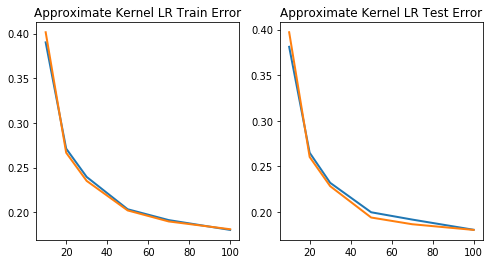

In [7]:
error_unif /= 5.
error_dpp /= 5.

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Approximate Kernel LR Train Error')
plt.plot(k_group, error_unif[0], label='unif', lw=2)
plt.plot(k_group, error_dpp[0], label='dpp', lw=2)

plt.subplot(1,2,2)
plt.title('Approximate Kernel LR Test Error')
plt.plot(k_group, error_unif[1], label='unif', lw=2)
plt.plot(k_group, error_dpp[1], label='dpp', lw=2)

#plt.savefig('fig/classification', bbox_inches='tight')
plt.show()